#**💡Extracción del Archivo Tratado**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/Telecom_X_2.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'customerID', 'Churn', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_monthly', 'Charges_total',
       'Cuentas_diarias', 'Tiene_suscripcion'],
      dtype='object')

In [4]:
df.head(5)

,Unnamed: 0,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_monthly,Charges_total,Cuentas_diarias,Tiene_suscripcion
0,0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667,Activa
1,1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667,Activa
2,2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,Activa
3,3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,Activa
4,4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667,Activa


#**🛠️ Preparación de los Datos**

**Eliminación de Columnas Irrelevantes**

In [5]:
df = df.drop(columns='customerID')

In [6]:
df = df.drop(columns='Tiene_suscripcion')

In [7]:
df = df.drop(columns='Unnamed: 0')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


In [9]:
df.head(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_monthly,Charges_total,Cuentas_diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


In [10]:
df['Cuentas_diarias'] = df['Cuentas_diarias'].round(2)


In [11]:
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1}).fillna(0).astype(int)


/tmp/ipython-input-3298405257.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1}).fillna(0).astype(int)


In [14]:
df['Charges_total'].unique()

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

In [15]:
pd.to_numeric(df['Charges_total'].str.replace("'", "").str.strip(), errors='coerce').isna().sum()


np.int64(11)

In [17]:
df['Charges_total'] = pd.to_numeric(
    df['Charges_total'].str.replace("'", "").str.strip(),
    errors='coerce'
)

In [18]:
df['Charges_total'].isna().sum()


np.int64(11)

In [19]:
df = df.dropna(subset=['Charges_total'])


In [20]:
print(df['Charges_total'].dtype)
print(df.shape)

float64
(7256, 21)


**Encoding**

In [21]:
import warnings

warnings.filterwarnings('ignore')


df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1}).astype(int)
df['Partner'] = df['Partner'].replace({'No':0, 'Yes':1})
df['Dependents'] = df['Dependents'].replace({'No':0, 'Yes':1})
df['PhoneService'] = df['PhoneService'].replace({'No':0, 'Yes':1})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'No':0, 'Yes':1})


df.sample(3)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_monthly,Charges_total,Cuentas_diarias
3429,1,Female,0,0,0,1,1,Yes,DSL,No,...,No,No,No,No,Month-to-month,1,Mailed check,50.10,50.10,1.67
4733,1,Male,0,1,0,67,1,No,Fiber optic,Yes,...,No,No,No,Yes,One year,1,Credit card (automatic),90.60,6056.15,3.02
5238,0,Male,0,0,0,8,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Credit card (automatic),20.45,162.30,0.68


In [22]:
suscripciones = ['MultipleLines','OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']


In [23]:
df['Tiene_suscripcion'] = df[suscripciones].apply(
    lambda row: 'Activa' if 'Yes' in row.values else 'Inactiva', axis=1)


In [24]:
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_monthly,Charges_total,Cuentas_diarias,Tiene_suscripcion
0,0,Female,0,1,1,9,1,No,DSL,No,...,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19,Activa
1,0,Male,0,0,0,9,1,Yes,DSL,No,...,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00,Activa
2,1,Male,0,0,0,4,1,No,Fiber optic,No,...,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46,Activa
3,1,Male,1,1,0,13,1,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27,Activa
4,1,Female,1,1,0,3,1,No,Fiber optic,No,...,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80,Activa


In [25]:
df.drop(columns=suscripciones, inplace=True)

In [26]:
df.sample(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,Charges_monthly,Charges_total,Cuentas_diarias,Tiene_suscripcion
3429,1,Female,0,0,0,1,1,DSL,Month-to-month,1,Mailed check,50.10,50.10,1.67,Activa
612,1,Male,0,1,0,13,1,Fiber optic,Month-to-month,1,Credit card (automatic),102.25,1359.00,3.41,Activa
204,0,Female,0,0,0,6,1,DSL,Month-to-month,0,Mailed check,55.15,322.90,1.84,Activa
547,0,Male,0,0,0,57,1,No,Two year,0,Bank transfer (automatic),20.65,1125.60,0.69,Inactiva
2514,0,Male,0,0,0,23,1,Fiber optic,One year,1,Credit card (automatic),99.95,2292.75,3.33,Activa


In [27]:
categoricas = ['gender','InternetService', 'Contract', 'PaymentMethod','Tiene_suscripcion']
pd.get_dummies(data=df,columns=categoricas,dtype=int).head()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges_monthly,Charges_total,Cuentas_diarias,...,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tiene_suscripcion_Activa,Tiene_suscripcion_Inactiva
0,0,0,1,1,9,1,1,65.6,593.30,2.19,...,0,0,1,0,0,0,0,1,1,0
1,0,0,0,0,9,1,0,59.9,542.40,2.00,...,0,1,0,0,0,0,0,1,1,0
2,1,0,0,0,4,1,1,73.9,280.85,2.46,...,0,1,0,0,0,0,1,0,1,0
3,1,1,1,0,13,1,1,98.0,1237.85,3.27,...,0,1,0,0,0,0,1,0,1,0
4,1,1,1,0,3,1,1,83.9,267.40,2.80,...,0,1,0,0,0,0,0,1,1,0


In [28]:
datos_codificados = pd.get_dummies(data=df,columns=categoricas,dtype=int)
datos_codificados.sample(5)

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges_monthly,Charges_total,Cuentas_diarias,...,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tiene_suscripcion_Activa,Tiene_suscripcion_Inactiva
5139,0,1,1,0,29,1,0,90.10,2656.70,3.00,...,0,0,1,0,1,0,0,0,1,0
2515,0,0,1,1,72,0,0,38.50,2763.00,1.28,...,0,0,0,1,0,1,0,0,1,0
5666,0,0,1,0,51,0,1,30.05,1529.45,1.00,...,0,1,0,0,0,1,0,0,1,0
4788,1,0,1,0,71,0,0,49.35,3515.25,1.64,...,0,0,0,1,0,0,1,0,1,0
7146,0,0,0,0,24,1,1,51.15,1275.70,1.70,...,0,1,0,0,0,0,1,0,1,0


In [29]:
datos_codificados.columns

Index(['Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'Charges_monthly', 'Charges_total',
       'Cuentas_diarias', 'gender_Female', 'gender_Male',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Tiene_suscripcion_Activa', 'Tiene_suscripcion_Inactiva'],
      dtype='object')

In [30]:
df = datos_codificados.drop(columns=['Tiene_suscripcion_Inactiva','gender_Male'])
df.sample(10)

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges_monthly,Charges_total,Cuentas_diarias,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tiene_suscripcion_Activa
2600,0,1,0,0,17,1,1,101.80,1752.45,3.39,...,1,0,1,0,0,0,0,1,0,1
284,0,0,1,0,31,1,1,83.85,2674.15,2.80,...,1,0,1,0,0,1,0,0,0,1
4009,1,0,0,0,4,1,1,60.40,272.15,2.01,...,0,0,1,0,0,0,0,0,1,1
2350,1,0,0,0,1,1,1,75.05,75.05,2.50,...,1,0,1,0,0,0,0,0,1,1
5854,0,0,0,0,15,1,0,25.05,369.10,0.84,...,0,1,0,0,1,1,0,0,0,1
3948,0,0,0,0,12,1,1,45.05,523.10,1.50,...,0,0,1,0,0,0,0,1,0,0
6433,0,0,0,0,63,1,1,20.60,1298.70,0.69,...,0,1,0,0,1,0,0,0,1,0
749,0,0,1,1,53,1,1,108.25,5935.10,3.61,...,1,0,1,0,0,1,0,0,0,1
3553,1,0,0,0,1,1,1,20.15,20.15,0.67,...,0,1,1,0,0,0,0,0,1,0
1083,0,0,0,0,24,1,0,25.15,553.00,0.84,...,0,1,0,0,1,0,1,0,0,1


**Verificación de la Proporción de Cancelación (Churn)**

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Churn                                    7256 non-null   int64  
 1   SeniorCitizen                            7256 non-null   int64  
 2   Partner                                  7256 non-null   int64  
 3   Dependents                               7256 non-null   int64  
 4   tenure                                   7256 non-null   int64  
 5   PhoneService                             7256 non-null   int64  
 6   PaperlessBilling                         7256 non-null   int64  
 7   Charges_monthly                          7256 non-null   float64
 8   Charges_total                            7256 non-null   float64
 9   Cuentas_diarias                          7256 non-null   float64
 10  gender_Female                            7256 non-nul

In [32]:
df['Churn'].value_counts()

,count
Churn,
0,5387
1,1869


In [33]:
import plotly.express as px

In [35]:
px.histogram(df, x='Churn',text_auto=True,barmode='group')

#**🎯 Correlación y Selección de Variables**

**Análisis de Correlación**

In [36]:
correlacion = df.corr(method='pearson', min_periods=1, numeric_only=True)

In [37]:
correlacion.style.background_gradient(cmap='coolwarm')

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges_monthly,Charges_total,Cuentas_diarias,gender_Female,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tiene_suscripcion_Activa
Churn,1.000000,0.146400,-0.148106,-0.160347,-0.345799,0.012337,0.186309,0.189393,-0.194440,0.189424,0.009494,-0.119945,0.300416,-0.223755,0.395067,-0.174340,-0.294467,-0.114953,-0.131448,0.294181,-0.089198,0.072440
SeniorCitizen,0.146400,1.000000,0.023439,-0.212338,0.017333,0.009885,0.157470,0.220098,0.103499,0.220106,0.004239,-0.108145,0.254868,-0.182481,0.136278,-0.047054,-0.114058,-0.015819,-0.022914,0.170320,-0.153742,0.128643
Partner,-0.148106,0.023439,1.000000,0.448500,0.379684,0.019496,-0.010303,0.098064,0.316918,0.098128,0.004593,-0.003359,0.003582,-0.000448,-0.277182,0.081293,0.245737,0.109764,0.081899,-0.079001,-0.099416,0.107093
Dependents,-0.160347,-0.212338,0.448500,1.000000,0.163444,-0.003212,-0.110541,-0.114345,0.063960,-0.114389,-0.011884,0.051661,-0.166369,0.140906,-0.228649,0.069582,0.200304,0.051254,0.062449,-0.150424,0.057690,-0.045778
tenure,-0.345799,0.017333,0.379684,0.163444,1.000000,0.009661,0.006662,0.246981,0.825118,0.246993,-0.005936,0.010917,0.019082,-0.035545,-0.650810,0.205752,0.562783,0.241031,0.235126,-0.208832,-0.232690,0.262152
PhoneService,0.012337,0.009885,0.019496,-0.003212,0.009661,1.000000,0.013804,0.247323,0.113791,0.247282,0.006065,-0.454829,0.291222,0.172730,-0.002686,-0.001727,0.004780,0.008099,-0.009893,0.004488,-0.003330,-0.094489
PaperlessBilling,0.186309,0.157470,-0.010303,-0.110541,0.006662,0.013804,1.000000,0.353503,0.159303,0.353492,0.011417,-0.061034,0.327418,-0.324073,0.167119,-0.051231,-0.146044,-0.018482,-0.011833,0.208592,-0.205076,0.246611
Charges_monthly,0.189393,0.220098,0.098064,-0.114345,0.246981,0.247323,0.353503,1.000000,0.652109,0.999996,0.013126,-0.161863,0.788581,-0.763420,0.058554,0.008672,-0.076567,0.038141,0.031132,0.275064,-0.377800,0.646636
Charges_total,-0.194440,0.103499,0.316918,0.063960,0.825118,0.113791,0.159303,0.652109,1.000000,0.652121,-0.000488,-0.054118,0.362778,-0.374618,-0.447152,0.175040,0.354547,0.180882,0.184990,-0.057178,-0.295076,0.437957
Cuentas_diarias,0.189424,0.220106,0.098128,-0.114389,0.246993,0.247282,0.353492,0.999996,0.652121,1.000000,0.013168,-0.161888,0.788615,-0.763432,0.058619,0.008620,-0.076592,0.038105,0.031123,0.275100,-0.377795,0.646623


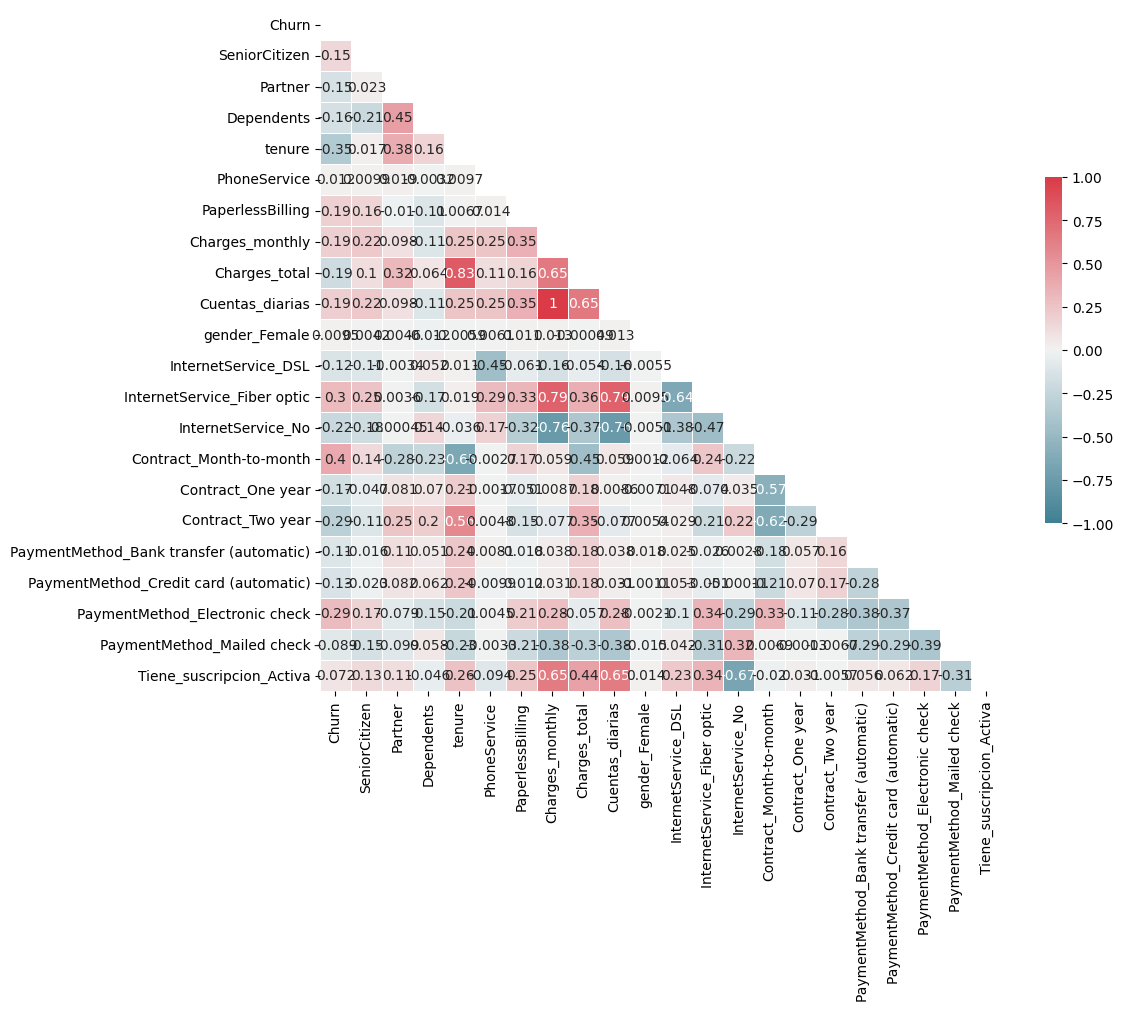

**Análisis Dirigido**

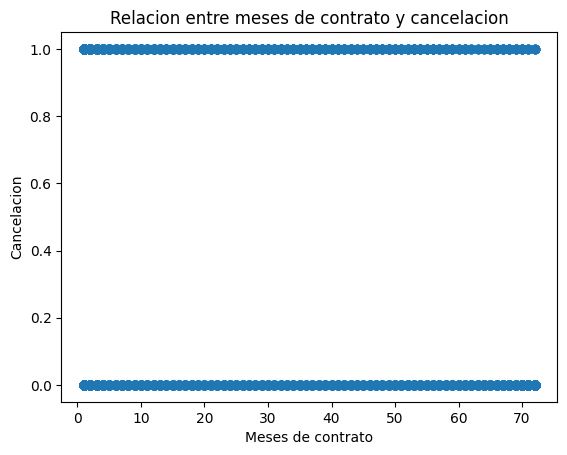

In [39]:
plt.scatter(df['tenure'], df['Churn'])
plt.title('Relacion entre meses de contrato y cancelacion')
plt.xlabel('Meses de contrato')
plt.ylabel('Cancelacion')
plt.show()

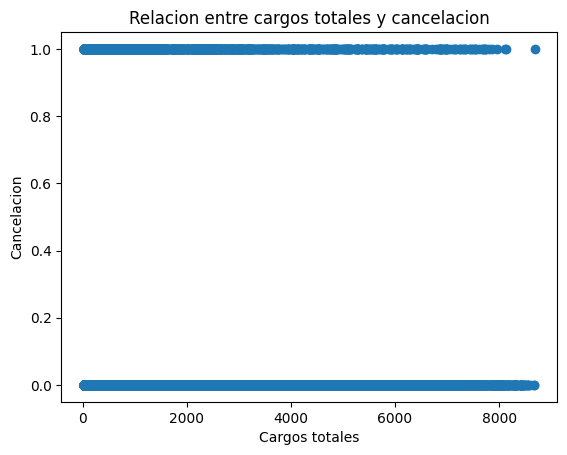

In [42]:
plt.scatter(df['Charges_total'], df['Churn'])
plt.title('Relacion entre cargos totales y cancelacion')
plt.xlabel('Cargos totales')
plt.ylabel('Cancelacion')
plt.show()

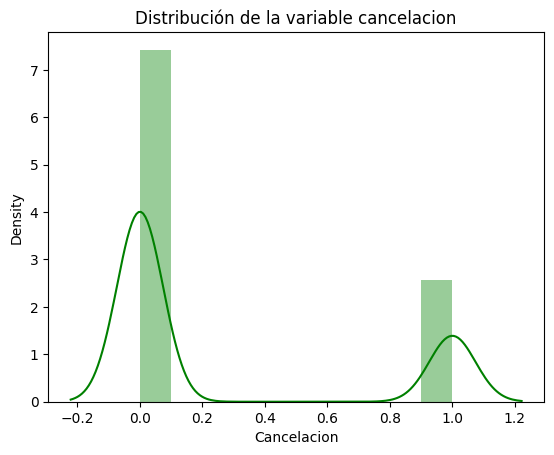

In [40]:
sns.distplot(df['Churn'],kde=True, color='green')
plt.title('Distribución de la variable cancelacion')
plt.xlabel('Cancelacion')
plt.show()

#**🤖 Modelado Predictivo**

**Separación de Datos**

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
y = df['Churn']
X = df.drop(columns='Churn')

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Balanceo de Clases**

In [48]:
print(y_train.value_counts(normalize=True))


Churn
0    0.742419
1    0.257581
Name: proportion, dtype: float64


In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


**Creación de Modelos**

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

modelo_rf = RandomForestClassifier(max_depth=5, random_state=42)
modelo_rf.fit(X_train_res, y_train_res)
print("Accuracy RF:", modelo_rf.score(X_test, y_test))



Accuracy RF: 0.7424242424242424


**Normalización o Estandarización**

In [82]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

normalizacion = MinMaxScaler()
X_train_res_norm = normalizacion.fit_transform(X_train_res)
X_test_norm = normalizacion.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_res_norm, y_train_res)

print("Accuracy KNN:", knn.score(X_test_norm, y_test))


Accuracy KNN: 0.7534435261707989


**Evaluación de los Modelos**

In [83]:
print("Random Forest Train:", modelo_rf.score(X_train_res, y_train_res))
print("Random Forest Test:", modelo_rf.score(X_test, y_test))


Random Forest Train: 0.8179391970294732
Random Forest Test: 0.7424242424242424


In [84]:
print("KNN Train:", knn.score(X_train_res_norm, y_train_res))
print("KNN Test:", knn.score(X_test_norm, y_test))


KNN Train: 0.8550707820840102
KNN Test: 0.7534435261707989


In [85]:
y_pred_rf = modelo_rf.predict(X_test)
print("Random Forest\n", classification_report(y_test, y_pred_rf))

y_pred_knn = knn.predict(X_test_norm)
print("KNN\n", classification_report(y_test, y_pred_knn))


Random Forest
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      1078
           1       0.50      0.78      0.61       374

    accuracy                           0.74      1452
   macro avg       0.70      0.75      0.71      1452
weighted avg       0.80      0.74      0.76      1452

KNN
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      1078
           1       0.52      0.55      0.53       374

    accuracy                           0.75      1452
   macro avg       0.68      0.69      0.68      1452
weighted avg       0.76      0.75      0.76      1452



In [86]:
from sklearn.model_selection import cross_val_score

scores_rf = cross_val_score(modelo_rf, X, y, cv=5, scoring='f1')
print("CV F1 Random Forest:", scores_rf.mean())

scores_knn = cross_val_score(knn, normalizacion.fit_transform(X), y, cv=5, scoring='f1')
print("CV F1 KNN:", scores_knn.mean())


CV F1 Random Forest: 0.5013290735441004
CV F1 KNN: 0.4681897138609787


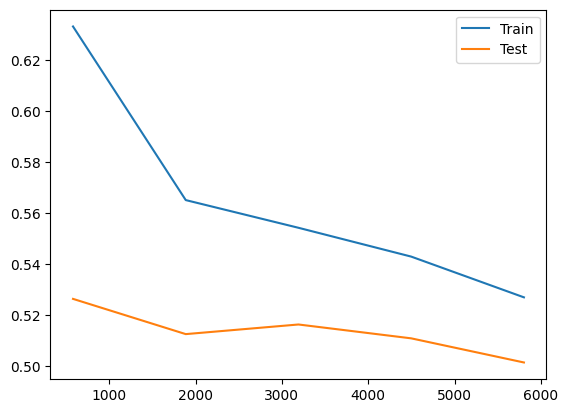

In [87]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    modelo_rf, X, y, cv=5, scoring="f1", n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Train")
plt.plot(train_sizes, test_mean, label="Test")
plt.legend()
plt.show()


In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

# ==============================
# 1. Random Forest GridSearchCV
# ==============================
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 5, 6, 8],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(rf, param_grid_rf, scoring='f1', cv=5, n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("=== Random Forest ===")
print("Mejores parámetros:", grid_rf.best_params_)
y_pred_rf = grid_rf.predict(X_test)
print("F1 Test:", f1_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# ==============================
# 2. KNN GridSearchCV
# ==============================
# Normalización
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3,5,7,9,11],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_knn = GridSearchCV(knn, param_grid_knn, scoring='f1', cv=5, n_jobs=-1)
grid_knn.fit(X_train_norm, y_train)

print("\n=== KNN ===")
print("Mejores parámetros:", grid_knn.best_params_)
y_pred_knn = grid_knn.predict(X_test_norm)
print("F1 Test:", f1_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


=== Random Forest ===
Mejores parámetros: {'max_depth': 8, 'min_samples_split': 10, 'n_estimators': 300}
F1 Test: 0.6094420600858369
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1078
           1       0.51      0.76      0.61       374

    accuracy                           0.75      1452
   macro avg       0.70      0.75      0.71      1452
weighted avg       0.80      0.75      0.76      1452


=== KNN ===
Mejores parámetros: {'metric': 'manhattan', 'n_neighbors': 7}
F1 Test: 0.501466275659824
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1078
           1       0.56      0.46      0.50       374

    accuracy                           0.77      1452
   macro avg       0.69      0.67      0.67      1452
weighted avg       0.75      0.77      0.76      1452



#**📋 Interpretación y Conclusiones**

**Análisis de la Importancia de las Variables**

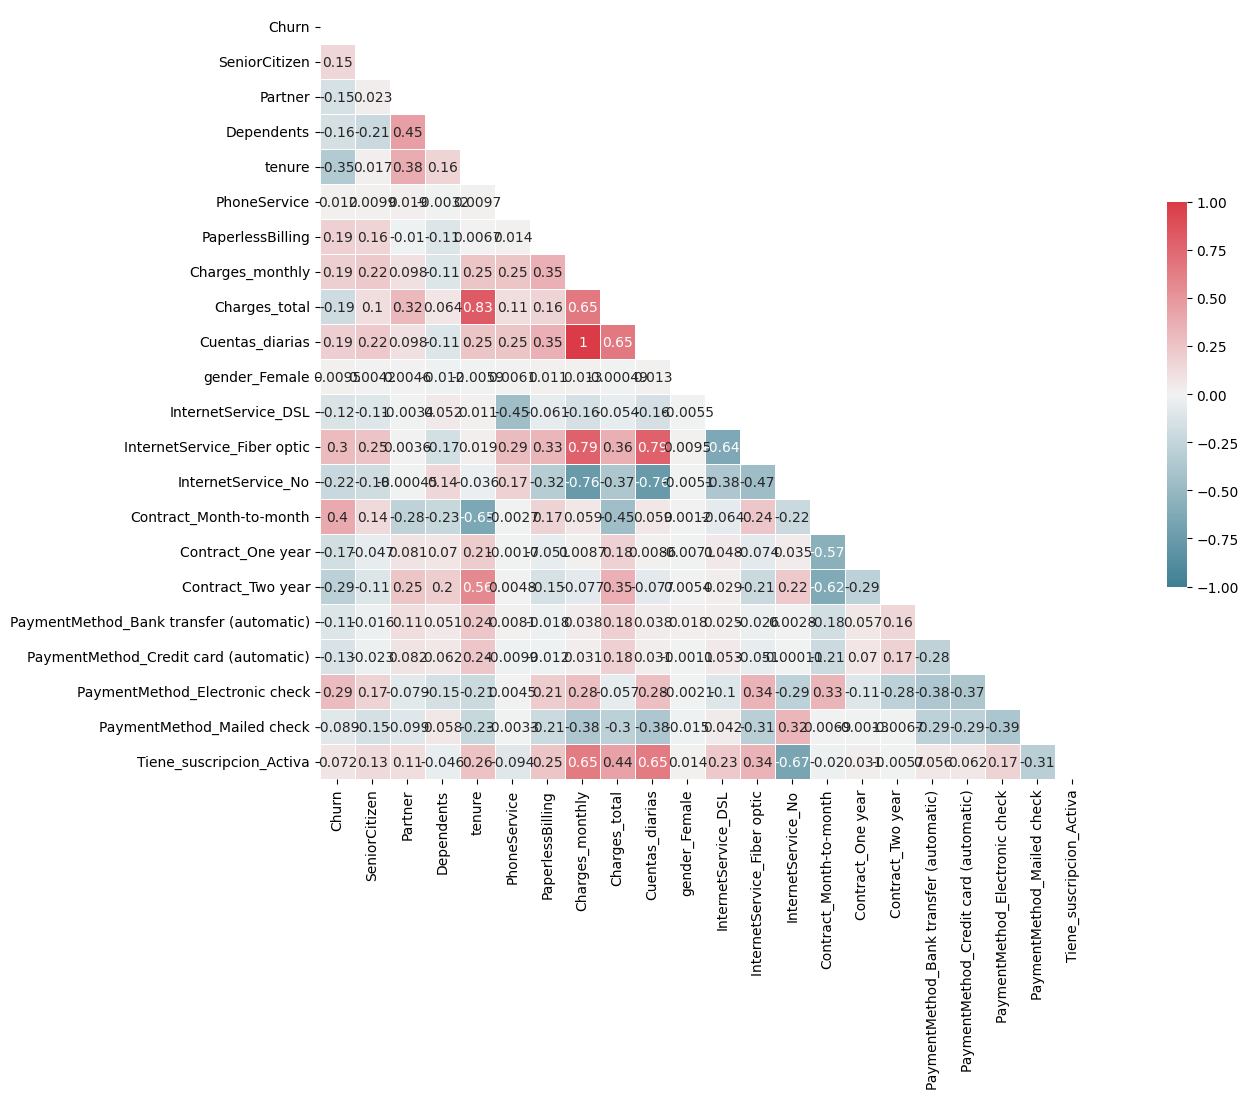

In [93]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Generar una máscara para el triángulo superior
mascara = np.zeros_like(correlacion, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(20, 10))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlacion, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

In [94]:
df.corr().round(4)

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges_monthly,Charges_total,Cuentas_diarias,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tiene_suscripcion_Activa
Churn,1.0000,0.1464,-0.1481,-0.1603,-0.3458,0.0123,0.1863,0.1894,-0.1944,0.1894,...,0.3004,-0.2238,0.3951,-0.1743,-0.2945,-0.1150,-0.1314,0.2942,-0.0892,0.0724
SeniorCitizen,0.1464,1.0000,0.0234,-0.2123,0.0173,0.0099,0.1575,0.2201,0.1035,0.2201,...,0.2549,-0.1825,0.1363,-0.0471,-0.1141,-0.0158,-0.0229,0.1703,-0.1537,0.1286
Partner,-0.1481,0.0234,1.0000,0.4485,0.3797,0.0195,-0.0103,0.0981,0.3169,0.0981,...,0.0036,-0.0004,-0.2772,0.0813,0.2457,0.1098,0.0819,-0.0790,-0.0994,0.1071
Dependents,-0.1603,-0.2123,0.4485,1.0000,0.1634,-0.0032,-0.1105,-0.1143,0.0640,-0.1144,...,-0.1664,0.1409,-0.2286,0.0696,0.2003,0.0513,0.0624,-0.1504,0.0577,-0.0458
tenure,-0.3458,0.0173,0.3797,0.1634,1.0000,0.0097,0.0067,0.2470,0.8251,0.2470,...,0.0191,-0.0355,-0.6508,0.2058,0.5628,0.2410,0.2351,-0.2088,-0.2327,0.2622
PhoneService,0.0123,0.0099,0.0195,-0.0032,0.0097,1.0000,0.0138,0.2473,0.1138,0.2473,...,0.2912,0.1727,-0.0027,-0.0017,0.0048,0.0081,-0.0099,0.0045,-0.0033,-0.0945
PaperlessBilling,0.1863,0.1575,-0.0103,-0.1105,0.0067,0.0138,1.0000,0.3535,0.1593,0.3535,...,0.3274,-0.3241,0.1671,-0.0512,-0.1460,-0.0185,-0.0118,0.2086,-0.2051,0.2466
Charges_monthly,0.1894,0.2201,0.0981,-0.1143,0.2470,0.2473,0.3535,1.0000,0.6521,1.0000,...,0.7886,-0.7634,0.0586,0.0087,-0.0766,0.0381,0.0311,0.2751,-0.3778,0.6466
Charges_total,-0.1944,0.1035,0.3169,0.0640,0.8251,0.1138,0.1593,0.6521,1.0000,0.6521,...,0.3628,-0.3746,-0.4472,0.1750,0.3545,0.1809,0.1850,-0.0572,-0.2951,0.4380
Cuentas_diarias,0.1894,0.2201,0.0981,-0.1144,0.2470,0.2473,0.3535,1.0000,0.6521,1.0000,...,0.7886,-0.7634,0.0586,0.0086,-0.0766,0.0381,0.0311,0.2751,-0.3778,0.6466


                                   Variable  Importancia
15                        Contract_Two year     0.146061
3                                    tenure     0.132217
13                  Contract_Month-to-month     0.131656
14                        Contract_One year     0.086371
2                                Dependents     0.071740
11              InternetService_Fiber optic     0.060945
7                             Charges_total     0.057862
6                           Charges_monthly     0.054636
8                           Cuentas_diarias     0.048773
12                       InternetService_No     0.048335
1                                   Partner     0.046020
10                      InternetService_DSL     0.034419
16  PaymentMethod_Bank transfer (automatic)     0.027070
17    PaymentMethod_Credit card (automatic)     0.024884
19               PaymentMethod_Mailed check     0.015372
4                              PhoneService     0.003425
9                             g

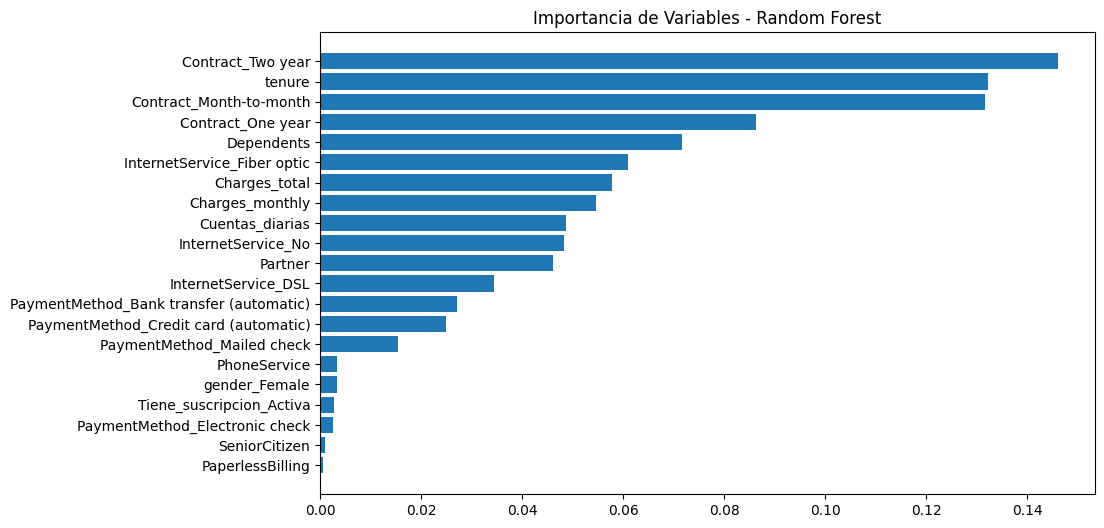

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Extraer la importancia de cada variable
importances = modelo_rf.feature_importances_
features = X_train.columns

# Crear un DataFrame
feat_importance_df = pd.DataFrame({
    'Variable': features,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

print(feat_importance_df)

# Visualizar
plt.figure(figsize=(10,6))
plt.barh(feat_importance_df['Variable'], feat_importance_df['Importancia'])
plt.gca().invert_yaxis()
plt.title('Importancia de Variables - Random Forest')
plt.show()


**Conclusiones**

1. Objetivo del análisis

El presente análisis tiene como objetivo desarrollar modelos predictivos capaces de prever que clientes tienen mayor probabilidad de cancelar sus servicios.

2. Calidad y tratamiento de los datos

Durante la revisión inicial del conjunto de datos, se detectaron inconsistencias en el formato de los datos, valores nulos, se realizo limpieza. Ademas se trataron las variables categoricas y se eliminaron las columnas irrelevantes.

3. Análisis exploratorio de datos (EDA)

En la fase de análisis exploratorio se identificaron relaciones relevantes entre variables, las cuales fueron evaluadas y representadas gráficamente.

Hallazgos principales:

Encontramos las variables mas importantes son  
  - Contratos por dos años

    La duracion del contrato a dos añoses la variable mas influyente. Los clientes con contrato largo tienden a quedarse mas tiempo

  - Tiempo de antigüedad

    Es lógico: cuanto más tiempo, menos probable que cancelen.

  - Contrato de mes por mes
    
    Contratos mensuales implican mayor riesgo de cancelación.

  - Contrato de un año

    Contratos anuales también influyen, pero menos que los anteriores.

Las variables con una importancia media son:
  - Dependientes
    
    Tener dependientes puede afectar la decisión de quedarse.

  - Serivicio de internet
    Tipo de servicio de internet importa, especialmente fibra óptica (posible insatisfacción con precio o servicio).

  - Cargos totales y mensuales
    Los cargos influyen, pero no tanto como los contratos.

Mientras que las variables con poca importancia, son:
- Servicio telefonico
- Genero
- Edad >65 años
- Método de pago
Estas variables tienen muy poca contribución a la predicción.

4. Conclusiones

El perfil más común del cliente que ha abandonado el servicio incluye:

  - Poca antigüedad con la empresa.

  - Contrato mensual.

  - Tiene dependientes.

  - Utiliza internet de fibra óptica.


5. Recomendaciones estratégicas

Con base en los hallazgos anteriores, se proponen las siguientes acciones para mejorar la retención de clientes:

- Fomentar contratos de mayor duración (anuales o bianuales), ofreciendo beneficios exclusivos frente al contrato mensual y facilitar su renovación.

- Diseñar paquetes integrados de servicios para toda la familia,

- Segmentar campañas enfocadas en clientes nuevos y de bajo consumo para aumentar su fidelización en los primeros meses.

- Auditar y mejorar servicio de fibra óptica para aumentar satisfacción.

